# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [5]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,  r2_score

%matplotlib inline

Прочитаем исходные данные:

In [7]:
data_well = pd.read_csv('unconv.csv')


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

In [11]:
data_well.head()
data_well.describe()  # Обобщенная информация о данных


,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,14.991150,4.330750,2.968850,48.161950,0.990450,1.964300,4311.219852
std,57.879185,2.971176,1.731014,0.566885,14.129455,0.481588,0.300827,992.038414
min,1.000000,6.550000,1.130000,1.280000,10.940000,-0.190000,0.930000,2107.139414
25%,50.750000,12.912500,3.122500,2.547500,37.755000,0.617500,1.770000,3618.064513
50%,100.500000,15.070000,4.035000,2.955000,49.510000,1.030000,1.960000,4284.687348
75%,150.250000,17.402500,5.287500,3.345000,58.262500,1.350000,2.142500,5086.089761
max,200.000000,23.550000,9.870000,4.630000,84.330000,2.180000,2.870000,6662.622385


In [12]:
print(data_well.isnull().sum()) # проверим на пропуски
display(data_well.head(5))  #возвращают 5 первых  строк таблицы
data_well.info() # Получение информации о столбцах
data_well.shape # Размерность таблицы

Well       0
Por        0
Perm       0
AI         0
Brittle    0
TOC        0
VR         0
Prod       0
dtype: int64


,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Well     200 non-null    int64  
 1   Por      200 non-null    float64
 2   Perm     200 non-null    float64
 3   AI       200 non-null    float64
 4   Brittle  200 non-null    float64
 5   TOC      200 non-null    float64
 6   VR       200 non-null    float64
 7   Prod     200 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


(200, 8)

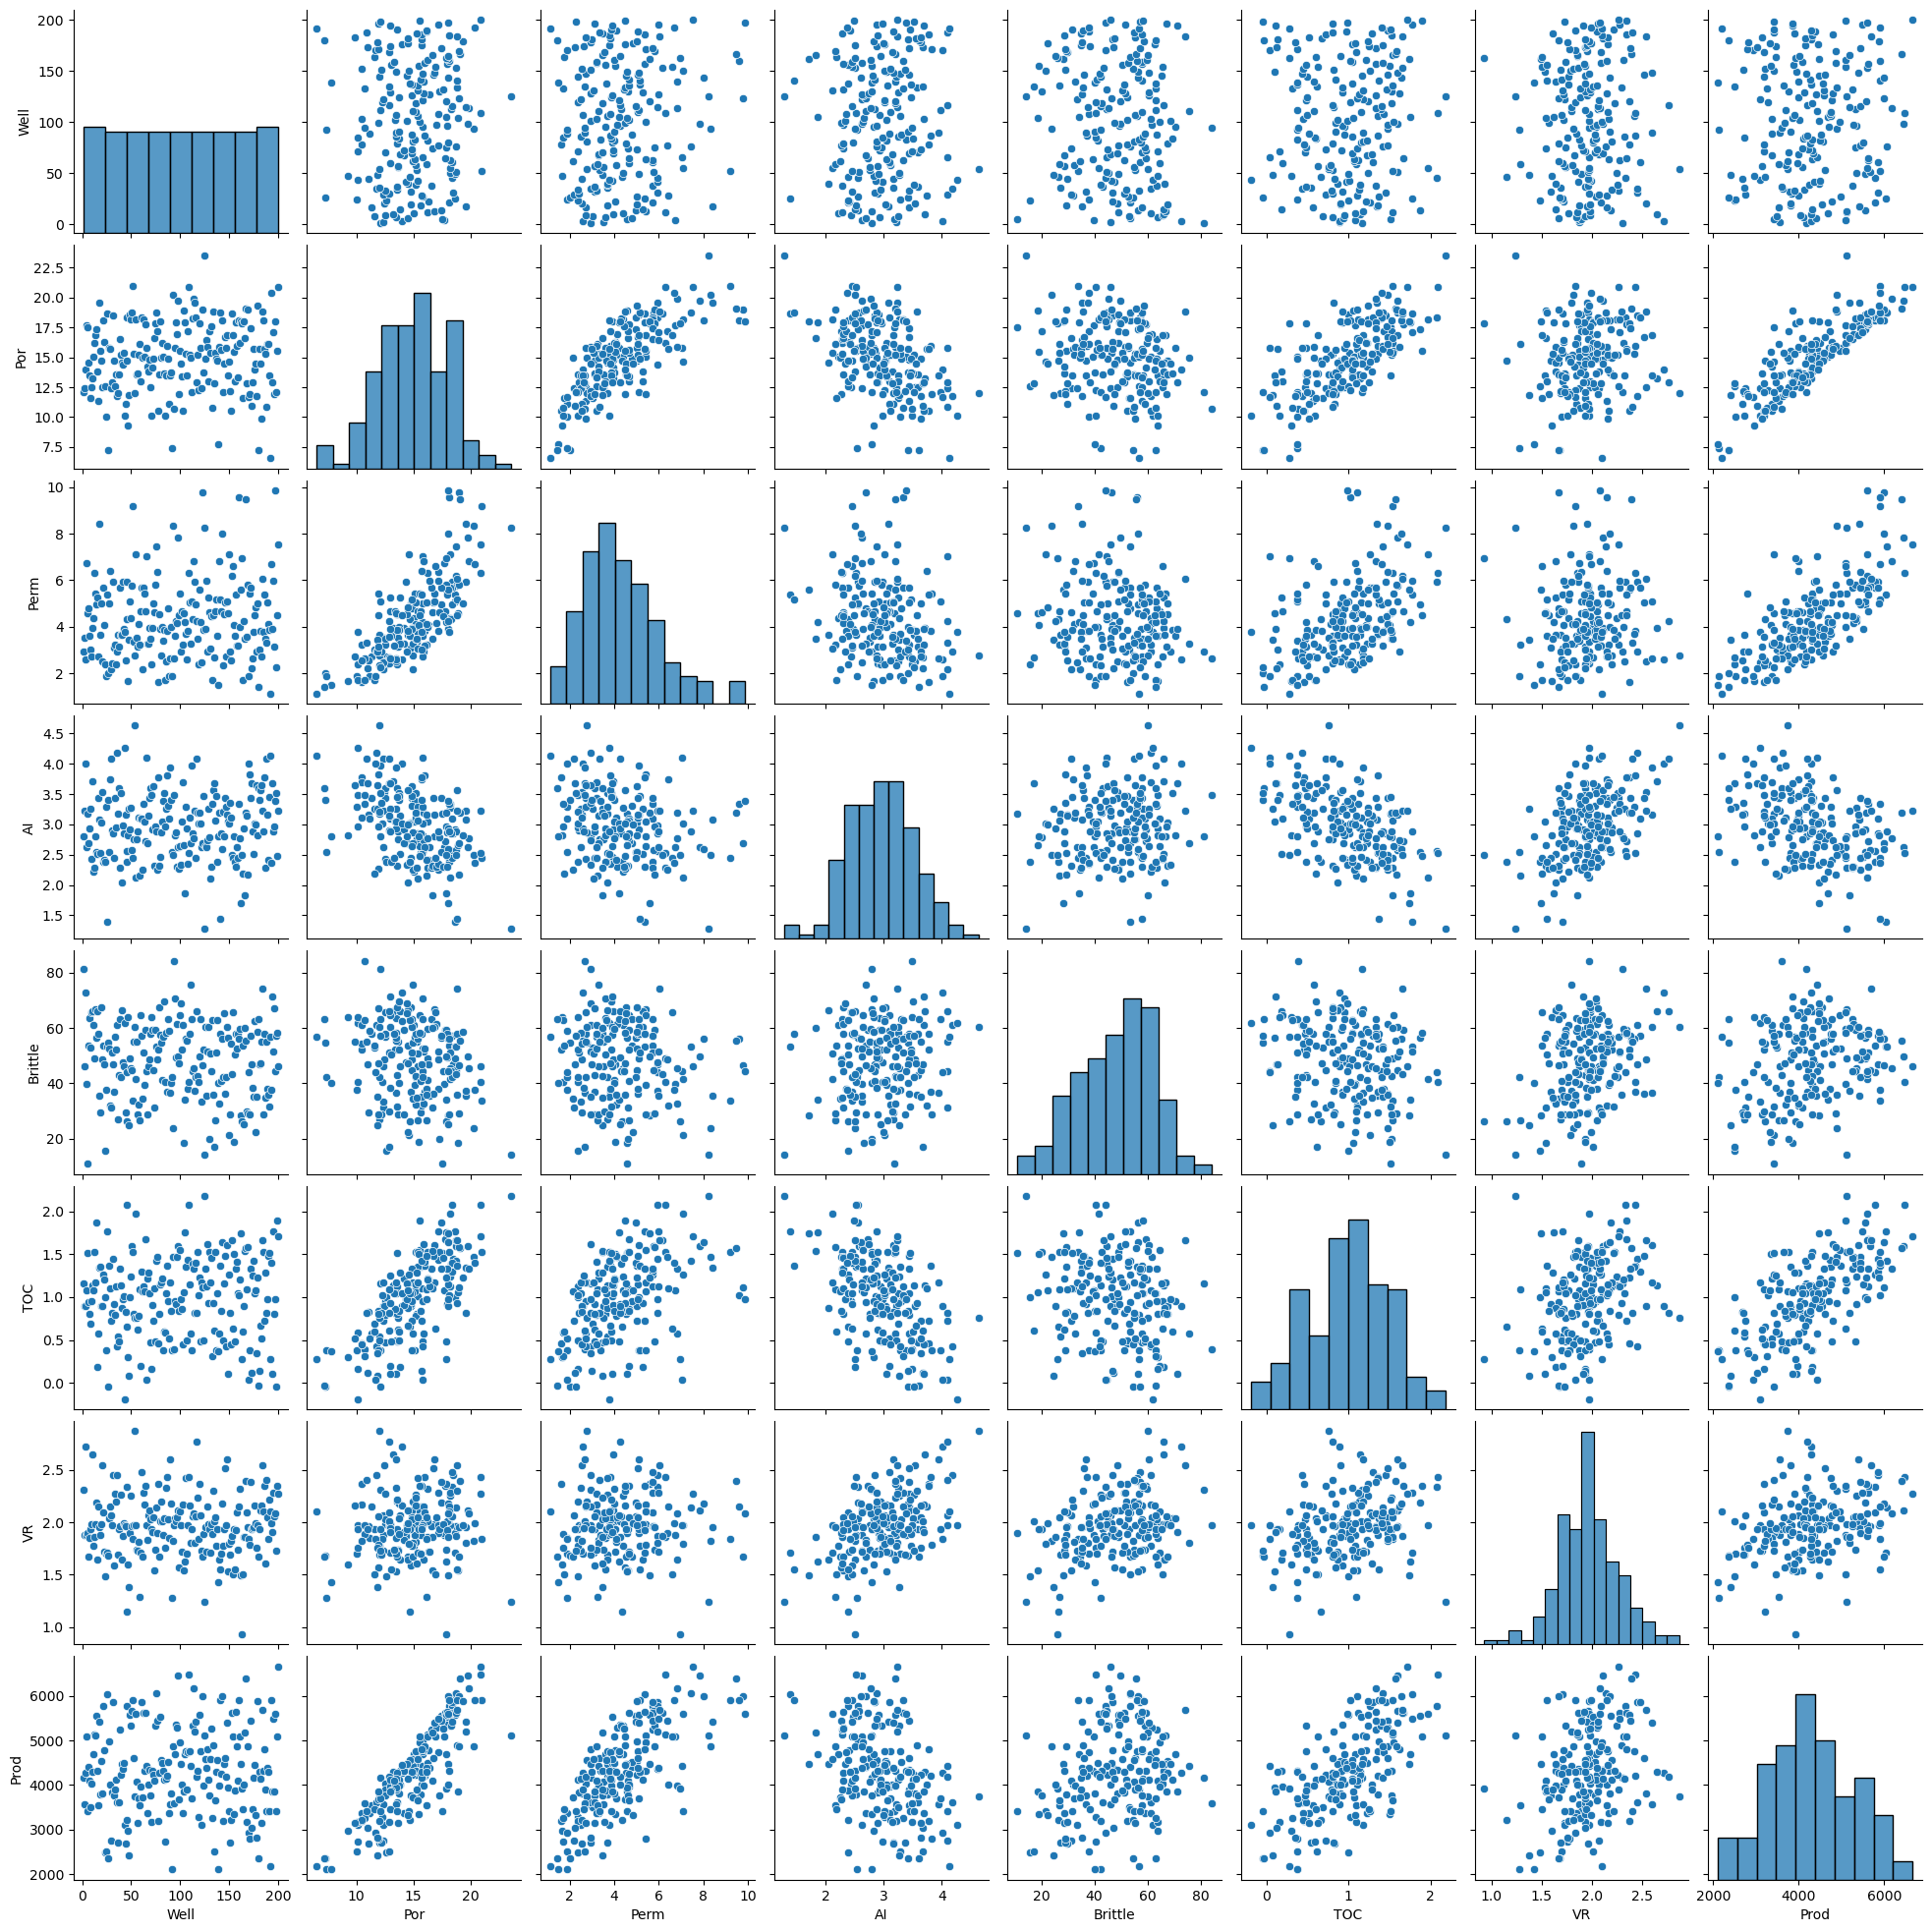

In [13]:
sns.pairplot(data=data_well) # отношения между всеми парами переменных.

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

Ранг корреляционной матрицы: 8
Определитель корреляционной матрицы: 0.0007299388072652082


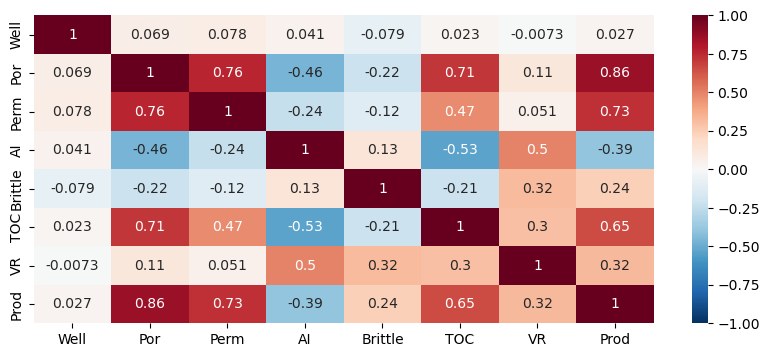

In [16]:
# Ваш код здесь
# получaем таблицу коэффициентов корреляции (матрицу корреляций):
corr_matrix = data_well.corr()

# ранг корреляционной матрицы
rang = np.linalg.matrix_rank(corr_matrix)
print('Ранг корреляционной матрицы:', rang)

# Рассчитываем определитель корреляционной матрицы
determinant = np.linalg.det(corr_matrix)
print('Определитель корреляционной матрицы:', determinant)

# рисуем тепловую карту
plt.figure(figsize=(10,4))
sns.heatmap(
    data_well.corr(),        
    cmap='RdBu_r', # задаёт цветовую схему
    annot=True, 
    vmin=-1, vmax=1); # указывает начало цветовых кодов от -1 до 1.

In [17]:
#sns.relplot(x='Por', y='Prod', data=data_well)

Ваши выводы здесь

1. Наибольшую корреляцию с целевым признаком — Prod имеют признаки Por(0.86), Perm(0.73) и TOC(0.65).
   также высокая корреляция  Por и Perm (0.76) и TOC и Por (0.71)
2. Определитель корреляционной матрицы близок к нулю - 0.00073. Это указывает на наличие сильной корреляции между переменными, матрица является плохо обусловленной, что может затруднить интерпретацию результатов. Мультиколлинеарность может стать причиной переобучаемости и увеличивает сложность модели ML.
3. Ранг корреляционной матрицы равен 8 (все 8 переменных линейно независимы). Модель классической линейной регрессии можно применить.

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [21]:
# Ваш код здесь
# Создаем матрицу наблюдений (x) и вектор правильных ответов (y), строим регрессию с константой (интерсептом)
x = np.column_stack((np.ones(data_well.shape[0]), data_well[['Well','Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR']]))
y = data_well['Prod'].values

# строим модель линейной регрессии (метод наименьших квадратов )
w_koef = np.linalg.inv(x.T @ x) @ x.T @ y

print(f'Kоэффициенты модели линейной регрессии: {np.round(w_koef, 0)}')


Kоэффициенты модели линейной регрессии: [-1232.     0.   230.   116.  -365.    25.   -78.   785.]



Признак Well неинформативный (индикатор скважины, не влияет на целевую переменную)
Наиболее значимыми факторами, увеличивающими добычу газа, являются пористость Por (230), проницаемость Perm (116) и коэффициент отражения витринита VR (785). Обратная зависимость с индексом литологии AI (-365). Индекс хрупкости Brittle оказывает небольшое влияние на целевую переменную

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [25]:
new_data = {
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
# ----------------------данные по одной скважине
new_arr = np.array([1, *new_data.values()])

prod_new = 4748.315024 # на новой скважине производится 4748.315024 миллионов кубических футов газа в день.
# ----------------------Прогноз выработки для новой скважины
wartet_prod_neu = round(new_arr @ w_koef,6)
# ----------------------Рассчитываем абсолютную ошибку
absolute_err = round(np.abs(wartet_prod_neu - prod_new),6)
# ----------------------Вывод результатов
print(f'Прогноз для новой скважины : {wartet_prod_neu}')
print(f'Фактическое значение добычи: {prod_new}')
print(f'Абсолютная ошибка прогноза : {absolute_err} что составляет {round(absolute_err/prod_new*100,2)} %')

# Прогноз выработки для всех скважин
predict = x @ w_koef
# Расчет метрик
mae = round(np.abs(y - predict).mean(),2)  # Среднее абсолютное отклонение (MAE) реальных данных от прогноза
mse = round(((y - predict) ** 2).mean(),2) # Среднее квадратическое отклонение (MSE)
r2 = round(r2_score(y, predict),2)         # Коэффициент детерминации

print(f'Среднее абсолютное отклонение (MAE) = {mae}')
print(f'Среднее квадратическое отклонение (MSE) = {mse}')
print(f'Коэффициент детерминации = {r2}')

Прогноз для новой скважины : 4723.064054
Фактическое значение добычи: 4748.315024
Абсолютная ошибка прогноза : 25.25097 что составляет 0.53 %
Среднее абсолютное отклонение (MAE) = 153.62
Среднее квадратическое отклонение (MSE) = 39315.04
Коэффициент детерминации = 0.96


Модель показала высокую точность прогноза, абсолютная ошибка - 25,25 (0,53%)
MAE (средняя абсолютная ошибка) — 153,62 что показывает близость предсказаний к фактическим значениями.
Высокое значение MSE может быть связано с наличием выбросов, т.к.возведение в квадрат существенно увеличивает те значения, которые лежат далеко от всех остальных. 
Коэффициент детерминации = 0.96, что означает регрессионная модель учитывает большую часть дисперсии. Это указывает на то, что модель хорошо соответствует данным.

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [29]:
# Вычисляем коэф. корреляции
correlation = data_well.corr()['Prod'].drop('Prod')
# сравниваем
compare = pd.DataFrame({
    'Корреляция': correlation,
    'Коэф.регрессии': w_koef[1:]  # без интерсета
}, index=correlation.index)
print(compare)


         Корреляция  Коэф.регрессии
Well       0.026817        0.050700
Por        0.861910      230.179140
Perm       0.727426      116.239006
AI        -0.390835     -365.202301
Brittle    0.237155       24.994370
TOC        0.654445      -78.400929
VR         0.323182      785.259815


> *Ваши выводы здесь*
> Мы получили согласованные результаты по параметру Por (Пористость): сильная положительная корреляция (0.86) соответствует высокому положительному коэффициенту (230) и Perm (Проницаемость): 0.73 и 116 соответственно. По параметру AI (Индекс литологии) отрицательная корреляция (-0.39) соответствует отрицательному коэффициенту регрессии (-365).
> Противоречия выявлены для параметров TOC (Общее содержание углерода) - корреляция положительная(0.65) при этом коэффициент регресии (-78) и для параметра VR (Индекс витринизации), который при невысокой корреляции (0.32) имеет высокий коэффициент регресии (785)
> Это может быть связано с корреляцией между факторами, взаимное влияние которых в модели не было учтено.

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [33]:
# Ваш код здесь
# Убираем ненужные столбцы из исходных данных
# Well - корреляция с целевой переменной 0.027
# Perm - корреляция с целевым признаком — Prod 0.73, корреляция  Por и Perm (0.76). Но у Por корреляция с цулевым признаком выше - 0,86

data_clean = data_well.drop(['Perm', 'Well'], axis=1)

# Создаем обновленную матрицу признаков
x_clean = np.column_stack((np.ones(data_clean.shape[0]), data_clean[['Por', 'AI', 'Brittle', 'TOC', 'VR']].values))  

# Целевая переменная  - y 
y_clean = data_clean[['Prod']].values  

# строим модель линейной регрессии
w_koef_clean = np.linalg.inv(x_clean.T @ x_clean) @ x_clean.T @ y_clean 

# Прогноз выработки для всех скважин
predict_clean = x_clean @ w_koef_clean
# Расчет метрик
mae = round(np.abs(y_clean - predict_clean).mean(),2)  # Среднее абсолютное отклонение (MAE) реальных данных от прогноза
mse = round(((y_clean - predict_clean) ** 2).mean(),2) # Среднее квадратическое отклонение (MSE)
r2_new = round(r2_score(y_clean, predict_clean),2)         # Коэффициент детерминации

w_koef_ = np.delete(w_koef, [0,1,3]) # убираем из коєффициентов старой модели коєффициент для Well,  Perm и интерсет

# Выводим результат
print(f'Среднее абсолютное отклонение (MAE) = {mae}')
print(f'Среднее квадратическое отклонение (MSE) = {mse}')
print(f'Коэффициент детерминации = {r2_new}')

print(f'Kоэффициенты старой модели линейной регрессии:                      {np.round(w_koef_, 0)}')
print(f'Kоэффициенты новой модели линейной регрессии, рассчитанные вручную: {np.round(w_koef_clean[1:].flatten(),0)}')



Среднее абсолютное отклонение (MAE) = 170.37
Среднее квадратическое отклонение (MSE) = 53393.68
Коэффициент детерминации = 0.95
Kоэффициенты старой модели линейной регрессии:                      [ 230. -365.   25.  -78.  785.]
Kоэффициенты новой модели линейной регрессии, рассчитанные вручную: [ 290. -140.   29.   89.  407.]


> *Ваши выводы здесь*
> В новой модели увеличилось влияние параметра пористости (Por) с 230 до 290. Это связано с тем, что мы исключили из модели признак Perm, имеющий сильную корреляцию с Por (0.76)  
> Значение параметра Содержание углерода (TOC) в новой модели согласуется с корреляцией, параметр имеет положительной влияние на целевой признак.
> AI уменьшил отрицательное влияние на добычу.
> При этом увеличились значения MAE (средняя абсолютная ошибка) — с 153,62 - до 170.37 и MSE с 39315.04 - до 53393.68
> Коэффициент детерминации = 0.95, модель по прежнему хорошо соответствует данным, что является ожидаемым, т.к. мы удалили один из 2-х сильно взаимнокоррелирующих факторов

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [37]:
# Ваш код здесь

# построим модель линейной регрессии
model_regres = LinearRegression()
model_regres.fit(x_clean, y_clean)
# значения полученных коэффициентов
koef_regres = model_regres.coef_           # Оценочные коэффициенты для задачи линейной регрессии.
koef_intercept = model_regres.intercept_      # Независимый член в линейной модели.

# Делаем прогноз для всего обучающего набора данных
y_regres = model_regres.predict(x_clean)

print(f'Kоэффициенты новой модели линейной регрессии, рассчитанные вручную: {np.round(w_koef_clean[1:].flatten(),0)}')
print(f'Kоэффициенты рассчитанные по библиотеке sklearn:  {np.round(koef_regres,0)}')

mae = mean_absolute_error(y_regres, y_clean)  # Среднее абсолютное отклонение (MAE) 
mse = mean_squared_error(y_regres, y_clean) # Среднее квадратическое отклонение (MSE)
print(f'Среднее абсолютное отклонение (MAE) = {mae}')
print(f'Среднее квадратическое отклонение (MSE) = {mse}')



Kоэффициенты новой модели линейной регрессии, рассчитанные вручную: [ 290. -140.   29.   89.  407.]
Kоэффициенты рассчитанные по библиотеке sklearn:  [[   0.  290. -140.   29.   89.  407.]]
Среднее абсолютное отклонение (MAE) = 170.36541690392474
Среднее квадратическое отклонение (MSE) = 53393.679736215534


> *Ваши выводы здесь*
> 
> Результаты из библиотеки sklearn и рассчитанные вручную коэффициенты совпадают. Модель работает корректно.

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [41]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [44]:
# Ваш код здесь

# используем обновленную матрицу признаков x_clean и y_clean как в задаче 5.5
x_clean = data_well[['Por', 'AI', 'VR', 'Brittle', 'TOC']]
y_clean = data_well['Prod']

# Стандартизация признаков
scaler = StandardScaler()
x_standart = scaler.fit_transform(x_clean)

# генерация полиномиальных признаков 3 порядка
poly = PolynomialFeatures(degree=3, include_bias=False)
x_poly = poly.fit_transform(x_standart)

#display(pd.DataFrame(x_poly).describe())

print(f'Количество факторов после генерации полиномиальных признаков: {x_poly.shape[1]}')

# Обучение модели линейной регрессии на полученных полиномиальных факторах 
model = LinearRegression()
model.fit(x_poly, y_clean)

# Кросс-валидация по MAE, MSE
poly_results_mae = cross_validate(model, x_poly, y_clean, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
poly_results_mse = cross_validate(model, x_poly, y_clean, scoring='neg_mean_squared_error', cv=5, return_train_score=True)

# Выводим
print(f'MAE на тренировочных фолдах: {-poly_results_mae['train_score'].mean():.2f}')
print(f'MAE на валидационных фолдах: {-poly_results_mae['test_score'].mean():.2f}')
print(f'MSE на тренировочных фолдах: {-poly_results_mse['train_score'].mean():.2f}')
print(f'MSE на валидационных фолдах: {-poly_results_mse['test_score'].mean():.2f}')



Количество факторов после генерации полиномиальных признаков: 55
MAE на тренировочных фолдах: 61.91
MAE на валидационных фолдах: 116.97
MSE на тренировочных фолдах: 6809.78
MSE на валидационных фолдах: 24965.78


> *Ваши выводы здесь*
> из 5 исходных признаков мы получили 55 полиномиальных (комбинации исходных признаков и их степеней до третьей степени включительно)
> Получено значительное улучшение метрик MAE и MSE по сравнению с линейной регрессией - MAE = 170.37, (MS) = 53393.8
> при этом значения выбранных метрик на тренировочных и валидационных фолдах сильно различаются. Это говорит о том, что модель склонна к переобучению - способна подстраиваться под очень сложные зависимости, из-за которых возникает высокий разброс. 

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [48]:
# Ваш код здесь
from sklearn.linear_model import Lasso

# Создание словаря, содержащего потенциальные значения альфа
# alpha_values = {'alpha': [0.1, 0.5, 1, 1.5, 2, 2.5]}
alpha_values = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 5, 10, 15, 20, 50]}
# Передача в GridSearchCV модели, потенциальных альфа-значений,
lasso_gscv = GridSearchCV(Lasso(max_iter=10000), alpha_values, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'], refit='neg_mean_absolute_error', cv=5)

# Лучшие найденные гиперпараметры
best_alpha = lasso_gscv.fit(x_poly, y).best_params_
print(f'Лучшее alpha: {best_alpha['alpha']}')

# Создаем модель
lasso_model = Lasso(alpha=best_alpha['alpha'], fit_intercept=True)

# Кросс-валидация по MAE, MSE
lasso_results_mae = cross_validate(lasso_model, x_poly, y_clean, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
lasso_results_mse = cross_validate(lasso_model, x_poly, y_clean, scoring='neg_mean_squared_error', cv=5, return_train_score=True)

# Выводим
print(f'MAE на тренировочных фолдах: {-lasso_results_mae['train_score'].mean():.2f}')
print(f'MAE на валидационных фолдах: {-lasso_results_mae['test_score'].mean():.2f}')
print(f'MSE на тренировочных фолдах: {-lasso_results_mse['train_score'].mean():.2f}')
print(f'MSE на валидационных фолдах: {-lasso_results_mse['test_score'].mean():.2f}')


Лучшее alpha: 5
MAE на тренировочных фолдах: 72.55
MAE на валидационных фолдах: 89.13
MSE на тренировочных фолдах: 9703.25
MSE на валидационных фолдах: 14585.88


> *Ваши выводы здесь*
> В данной модели альфа= 5, т.о. мы наложили ограничения на норму весов и разбег значений выбранных метрик на тренировочных и валидационных фолдах уменьшился. 

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [51]:
# Ваш код здесь
from sklearn.linear_model import Ridge

# Передаем в GridSearchCV модели след. значения:
ridge_gscv = GridSearchCV(Ridge(max_iter=10000), alpha_values, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'],
                          refit='neg_mean_absolute_error',
                          cv=5)

# Лучшие найденные гиперпараметры
best_par_ridge = ridge_gscv.fit(x_poly, y).best_params_
print(f'Лучшее alpha: {best_par_ridge['alpha']}')

# Создаем модель
ridge_model = Ridge(alpha=best_par_ridge['alpha'], fit_intercept=True)

# Кросс-валидация по MAE, MSE
ridge_results_mae = cross_validate(ridge_model, x_poly, y_clean, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
ridge_results_mse = cross_validate(ridge_model, x_poly, y_clean, scoring='neg_mean_squared_error', cv=5, return_train_score=True)

# Выводим
print(f'MAE на тренировочных фолдах: {-ridge_results_mae['train_score'].mean():.2f}')
print(f'MAE на валидационных фолдах: {-ridge_results_mae['test_score'].mean():.2f}')
print(f'MSE на тренировочных фолдах: {-ridge_results_mse['train_score'].mean():.2f}')
print(f'MSE на валидационных фолдах: {-ridge_results_mse['test_score'].mean():.2f}')


Лучшее alpha: 0.9
MAE на тренировочных фолдах: 64.77
MAE на валидационных фолдах: 105.37
MSE на тренировочных фолдах: 7549.37
MSE на валидационных фолдах: 19426.05


> *Ваши выводы здесь*
> В данной модели альфа=0.9, что также позволило нам уменьшить переобучение модели. Но мы получили больший разбег разбег значений выбранных метрик на тренировочных и валидационных фолдах по сравнению с моделью Lasso. При использовании регуляризации Ridge качество предсказаний немного ухудшилось по сравнению с использованием lasso.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [56]:
# Ваш код здесь
# Созданем список потенциальных значений l1_ratio
param_bloc = {
    'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 5, 10, 15, 20, 50],
    'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}

# Передаем в GridSearchCV модели значения:
elastic_gscv = GridSearchCV(ElasticNet(fit_intercept=True, max_iter=10000), param_grid=param_bloc,
                     scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'],
                     refit='neg_mean_absolute_error',
                     cv=5)

# Лучшие коєффициенты
best_params_elastic = elastic_gscv.fit(x_poly, y).best_params_
alpha_elastic = best_params_elastic['alpha']
l1_ratio_elastic = best_params_elastic['l1_ratio']

print(f'Лучшие значения alpha: {alpha_elastic}, l1_ratio: {l1_ratio_elastic}')

# Создаем модель
elactic_model = ElasticNet(alpha=alpha_elastic, l1_ratio=l1_ratio_elastic, fit_intercept=True)

# Кросс-валидация по MAE, MSE
elactic_results_mae = cross_validate(elactic_model, x_poly, y_clean, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
elactic_results_mse = cross_validate(elactic_model, x_poly, y_clean, scoring='neg_mean_squared_error', cv=5, return_train_score=True)

# Выводим
print(f'MAE на тренировочных фолдах: {-elactic_results_mae['train_score'].mean():.2f}')
print(f'MAE на валидационных фолдах: {-elactic_results_mae['test_score'].mean():.2f}')
print(f'MSE на тренировочных фолдах: {-elactic_results_mse['train_score'].mean():.2f}')
print(f'MSE на валидационных фолдах: {-elactic_results_mse['test_score'].mean():.2f}')

Лучшие значения alpha: 5, l1_ratio: 1
MAE на тренировочных фолдах: 72.55
MAE на валидационных фолдах: 89.13
MSE на тренировочных фолдах: 9703.25
MSE на валидационных фолдах: 14585.88


> *Ваши выводы здесь*
> Модель ElasticNet с гиперпараметрами alpha = 5 и l1_ratio = 1 показывает результат, идентичный в модели с использованием только Lasso. Это означает что эффекта синергии двух методов в данной модели нет. Для улучшения модели нужно использовать другие коэффициенты регуляризации

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [60]:
# Ваш код здесь
rezult_data = pd.DataFrame({
    'Модель': ['LinearRegression','Polynomial', 'Lasso', 'Ridge', 'ElasticNet'],
    'Гиперпараметры': [np.nan, np.nan, best_alpha, best_par_ridge, best_params_elastic],
    'Полиномиальные признаки': [False, True, True, True, True],
    'MAE train': [mae, -poly_results_mae['train_score'].mean(), -lasso_results_mae['train_score'].mean(), -ridge_results_mae['train_score'].mean(), -elactic_results_mae['train_score'].mean()],
    'MAE test': [np.nan, -poly_results_mae['test_score'].mean(), -lasso_results_mae['test_score'].mean(), -ridge_results_mae['test_score'].mean(), -elactic_results_mae['test_score'].mean()],
    'MSE train': [mae, -poly_results_mse['train_score'].mean(), -lasso_results_mse['train_score'].mean(), -ridge_results_mse['train_score'].mean(), -elactic_results_mse['train_score'].mean()],
    'MSE test': [np.nan, -poly_results_mse['test_score'].mean(), -lasso_results_mse['test_score'].mean(), -ridge_results_mse['test_score'].mean(), -elactic_results_mse['test_score'].mean()],
})


display(rezult_data)

,Модель,Гиперпараметры,Полиномиальные признаки,MAE train,MAE test,MSE train,MSE test
0,LinearRegression,NaN,False,170.365417,NaN,170.365417,NaN
1,Polynomial,NaN,True,61.913339,116.969121,6809.782493,24965.782790
2,Lasso,{'alpha': 5},True,72.553941,89.128087,9703.247675,14585.876531
3,Ridge,{'alpha': 0.9},True,64.774251,105.365527,7549.365909,19426.047176
4,ElasticNet,"{'alpha': 5, 'l1_ratio': 1}",True,72.553941,89.128087,9703.247675,14585.876531


> *Ваши выводы здесь*
>
> Mодели Lasso и ElasticNet показали наилучшие результаты как по метрикам MAE и MSE. Они обеспечивают наилучшую точность прогнозирования и позволили снизить эффект переобучения модели.
> При этом использование коэффициента l1_ratio = 1 в модели ElasticNet фактически нивелировало эффект комбинации L1 и L2
 -регуляризации. В данном случае модель не использована обобщающая способность модели ElasticNet. 